# PDAS End-Semester Assignment - COE Analysis
## Import Dependencies

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [279]:
pqp = pd.read_csv('data/coe-results-prevailing-quota-premium.csv')
pqp.head()

,month,vehicle_class,pqp
0,2010-02,Category A,18266
1,2010-02,Category B,19146
2,2010-02,Category C,18212
3,2010-02,Category D,867
4,2010-03,Category A,19331


In [280]:
coe = pd.read_csv('data/coe-results.csv')
coe.head()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889


In [281]:
deregistered = pd.read_csv('data/motor-vehicles-de-registered-under-vehicle-quota-system-vqs.csv')
deregistered.head()

,month,category,number
0,2014-01,Category A,1011
1,2014-01,Category B,927
2,2014-01,Category C,711
3,2014-01,Category D,760
4,2014-01,Taxis,143


In [282]:
registered = pd.read_csv('data/new-registration-of-motor-vehicles-under-vehicle-quota-system-vqs.csv')
registered.head()

,month,category,number
0,2014-01,Category A,844
1,2014-01,Category B,1224
2,2014-01,Category C,309
3,2014-01,Category C-ETS,123
4,2014-01,Category D,1017


In [283]:
population = pd.read_csv('data/motor-vehicle-population-under-vehicle-quota-system.csv')
population.head()

,month,category,number
0,2014-01,Category A,341519
1,2014-01,Category B,279902
2,2014-01,Category C,154144
3,2014-01,Category D,144631
4,2014-01,Taxis,27779


## Simulated Data Dirty

### PQP Dataset

In [284]:
even_pqp_rows = pqp.index % 2 == 0
pqp.loc[even_pqp_rows, 'vehicle_class'] = pqp.loc[even_pqp_rows, 'vehicle_class'].str.lower()
pqp

,month,vehicle_class,pqp
0,2010-02,category a,18266
1,2010-02,Category B,19146
2,2010-02,category c,18212
3,2010-02,Category D,867
4,2010-03,category a,19331
...,...,...,...
487,2020-03,Category D,4126
488,2020-04,category a,32875
489,2020-04,Category B,33568
490,2020-04,category c,24271


### COE Dataset

In [285]:
coe2 = coe.copy(deep=True)
coe['bidding_no'] = coe['bidding_no'].drop_duplicates()
coe.fillna(method='ffill', inplace=True)
(coe.all() == coe2.all()).all()

True

### Registration Dataset

In [286]:
print(pd.unique(registered['category'].values))

registered['category'].replace(to_replace='Category C-ETS', value='Category C', inplace=True)
# registered['category'] = registered[~registered['category'].str.contains(r'(Taxis|Vehicles Exempted From VQS)')]

# pd.unique(registered['category'].values)
registered = registered[~registered['category'].str.contains('Taxis')]
registered = registered[~registered['category'].str.contains('Vehicles Exempted From VQS')]

print(pd.unique(registered['category'].values))

registered.rename(columns=dict(month='Date', category='Category', number='Number of Registered'), inplace=True)
registered.groupby(by=['Date', 'Category']).sum().reset_index()

['Category A' 'Category B' 'Category C' 'Category C-ETS' 'Category D'
 'Taxis' 'Vehicles Exempted From VQS']
['Category A' 'Category B' 'Category C' 'Category D']


,Date,Category,Number of Registered
0,2014-01,Category A,844
1,2014-01,Category B,1224
2,2014-01,Category C,432
3,2014-01,Category D,1017
4,2014-02,Category A,754
...,...,...,...
299,2020-03,Category D,1371
300,2020-04,Category A,263
301,2020-04,Category B,419
302,2020-04,Category C,244


### Deregistration Dataset

In [287]:
print(pd.unique(deregistered['category'].values))

deregistered = deregistered[~deregistered['category'].str.contains('Taxis')]
deregistered = deregistered[~deregistered['category'].str.contains('Vehicles Exempted from VQS')]

print(pd.unique(deregistered['category'].values))

deregistered.rename(columns=dict(month='Date', category='Category', number='Number of Deregistered'), inplace=True)
deregistered

['Category A' 'Category B' 'Category C' 'Category D' 'Taxis'
 'Vehicles Exempted from VQS']
['Category A' 'Category B' 'Category C' 'Category D']


,Date,Category,Number of Deregistered
0,2014-01,Category A,1011
1,2014-01,Category B,927
2,2014-01,Category C,711
3,2014-01,Category D,760
6,2014-02,Category A,1104
...,...,...,...
447,2020-03,Category D,1291
450,2020-04,Category A,1707
451,2020-04,Category B,1394
452,2020-04,Category C,663


### Population Dataset

In [288]:
population.rename(columns=dict(month='Date', category='Category', number='Population'), inplace=True)
population

,Date,Category,Population
0,2014-01,Category A,341519
1,2014-01,Category B,279902
2,2014-01,Category C,154144
3,2014-01,Category D,144631
4,2014-01,Taxis,27779
...,...,...,...
295,2018-02,Category B,292773
296,2018-02,Category C,152883
297,2018-02,Category D,140323
298,2018-02,Taxis,22440


## Merge Datasets

In [290]:
c = pd.merge(left=coe, right=pqp, on=['month', 'vehicle_class'])
d = pd.merge(left=pd.merge(left=deregistered, right=registered, on=[
             'Date', 'Category']), right=population, on=['Date', 'Category'], how='inner')

clean = pd.merge(left=c, right=d, left_on=[
                 'month', 'vehicle_class'], right_on=['Date', 'Category'])

In [292]:
clean[['year', 'month']] = clean['Date'].str.extract(r'(\d{4})-(\d{2})')

### Notes

<AxesSubplot:xlabel='year', ylabel='count'>

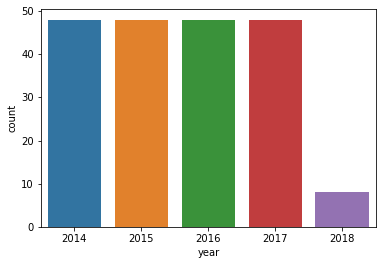

In [294]:
sns.countplot(data=clean, x='year')

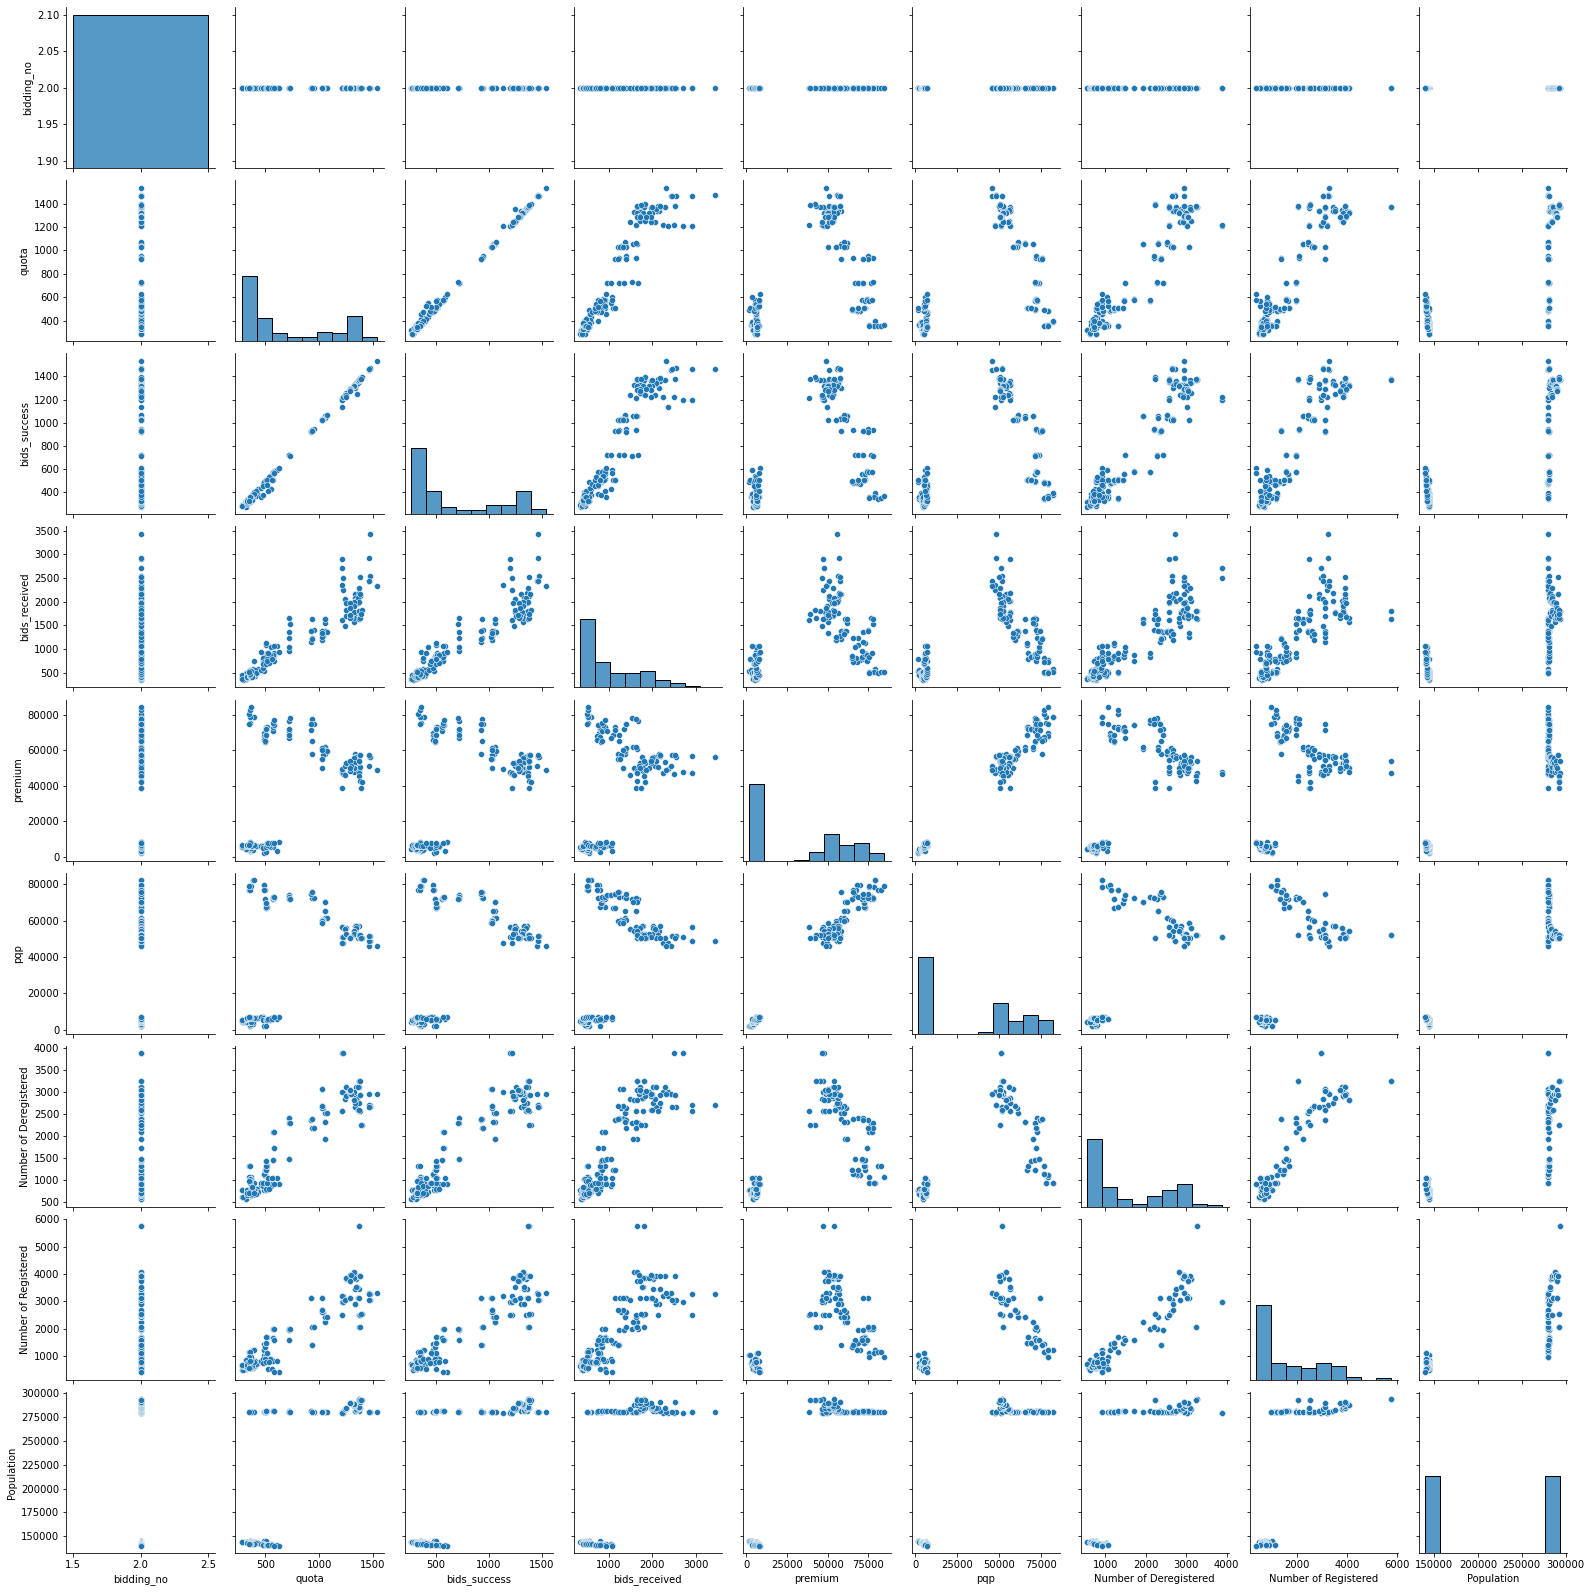

In [296]:
# sns.pairplot(data=clean)

## Export Cleaned and Combined Dataset

In [209]:
clean.to_csv('data/out/clean.csv')